In [24]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [25]:
t_range = pd.date_range('2016-01-01', '2016-12-31')

In [26]:
t_range

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25',
               '2016-12-26', '2016-12-27', '2016-12-28', '2016-12-29',
               '2016-12-30', '2016-12-31'],
              dtype='datetime64[ns]', length=366, freq='D')

In [27]:
s1 = Series(np.random.randn(len(t_range)), index=t_range)
s1

2016-01-01   -0.041900
2016-01-02    0.763357
2016-01-03    0.873523
2016-01-04   -0.377032
2016-01-05    0.893050
                ...   
2016-12-27    2.435146
2016-12-28    1.560768
2016-12-29   -1.933188
2016-12-30    1.292296
2016-12-31   -1.574459
Freq: D, Length: 366, dtype: float64

In [28]:
s1['2016-01'].mean()

0.13093317877841476

In [29]:
s1_month = s1.resample('M').mean()

In [30]:
s1_month.index

DatetimeIndex(['2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31'],
              dtype='datetime64[ns]', freq='M')

In [31]:
s1.resample('H').bfill() # 这里的b是back forward，用后面的数据填充。如一月的除了已经有的一号数据，其他的都用2月1日的数据填充

2016-01-01 00:00:00   -0.041900
2016-01-01 01:00:00    0.763357
2016-01-01 02:00:00    0.763357
2016-01-01 03:00:00    0.763357
2016-01-01 04:00:00    0.763357
                         ...   
2016-12-30 20:00:00   -1.574459
2016-12-30 21:00:00   -1.574459
2016-12-30 22:00:00   -1.574459
2016-12-30 23:00:00   -1.574459
2016-12-31 00:00:00   -1.574459
Freq: H, Length: 8761, dtype: float64

In [32]:
t_range = pd.date_range('2016-01-01', '2016-12-31', freq='H')

In [33]:
t_range

DatetimeIndex(['2016-01-01 00:00:00', '2016-01-01 01:00:00',
               '2016-01-01 02:00:00', '2016-01-01 03:00:00',
               '2016-01-01 04:00:00', '2016-01-01 05:00:00',
               '2016-01-01 06:00:00', '2016-01-01 07:00:00',
               '2016-01-01 08:00:00', '2016-01-01 09:00:00',
               ...
               '2016-12-30 15:00:00', '2016-12-30 16:00:00',
               '2016-12-30 17:00:00', '2016-12-30 18:00:00',
               '2016-12-30 19:00:00', '2016-12-30 20:00:00',
               '2016-12-30 21:00:00', '2016-12-30 22:00:00',
               '2016-12-30 23:00:00', '2016-12-31 00:00:00'],
              dtype='datetime64[ns]', length=8761, freq='H')

In [34]:
stock_df = DataFrame(index=t_range)

In [35]:
stock_df['BABA'] = np.random.randint(80, 160, size=len(t_range))
stock_df['BABA']

2016-01-01 00:00:00     91
2016-01-01 01:00:00     95
2016-01-01 02:00:00    137
2016-01-01 03:00:00     96
2016-01-01 04:00:00     98
                      ... 
2016-12-30 20:00:00    111
2016-12-30 21:00:00    139
2016-12-30 22:00:00    142
2016-12-30 23:00:00    146
2016-12-31 00:00:00    129
Freq: H, Name: BABA, Length: 8761, dtype: int64

In [36]:
stock_df['TENCENT'] = np.random.randint(30, 50, size=len(t_range))

In [37]:
stock_df.head()

,BABA,TENCENT
2016-01-01 00:00:00,91,40
2016-01-01 01:00:00,95,40
2016-01-01 02:00:00,137,44
2016-01-01 03:00:00,96,47
2016-01-01 04:00:00,98,38


<Axes: >

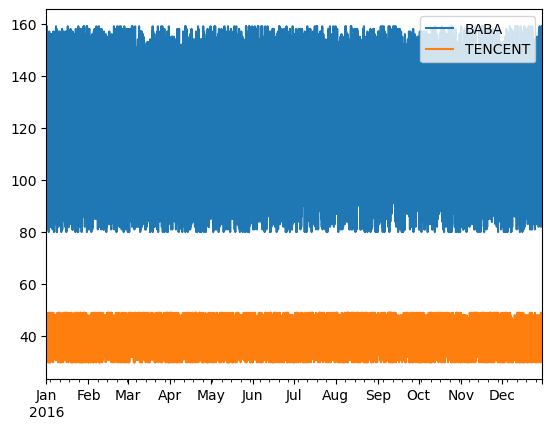

In [38]:
stock_df.plot()

In [39]:
import matplotlib.pyplot as plt
plt.show()

In [40]:
weekly_df = DataFrame()

In [41]:
weekly_df['BABA'] = stock_df['BABA'].resample('W').mean()

In [42]:
weekly_df['TENCENT'] = stock_df['TENCENT'].resample('W').mean()

In [43]:
weekly_df.head()

,BABA,TENCENT
2016-01-03,116.861111,39.027778
2016-01-10,120.559524,39.696429
2016-01-17,122.130952,39.595238
2016-01-24,119.267857,39.273810
2016-01-31,123.636905,39.517857


<Axes: >

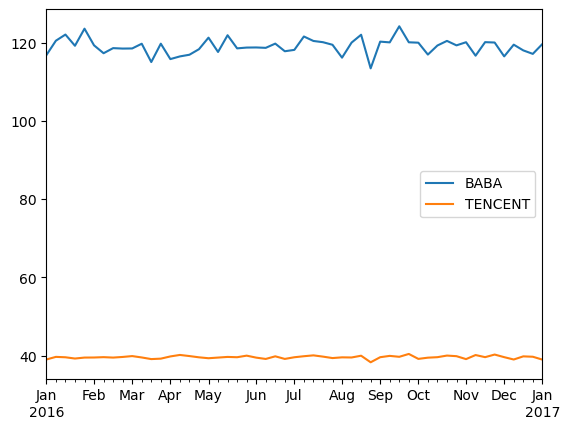

In [44]:
weekly_df.plot()

In [45]:
plt.show()